In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

import sys
from paths import Paths
paths = Paths()
sys.path.append(paths.scripts_root)
import util

%load_ext autoreload
%autoreload 2

# Display entire width of browser
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

paths.print_paths()

from skimage import io


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Paths defined in paths module:
 paths.inhouse: /Users/trafferty/dev/src/inhouse
 paths.tmp_root: /Users/trafferty/data/tmp
 paths.tmp_dir: /Users/trafferty/tmp
 paths.notebook_root: /Users/trafferty/data/notebooks
 paths.scripts_root: /Users/trafferty/data/scripts
 paths.mii_home: /Users/trafferty/dev
 paths.images_root: /Users/trafferty/data/images
 paths.ws_dir: /Users/trafferty/workspace
 paths.data_root: /Users/trafferty/data
 paths.projects_root: /Users/trafferty/data/projects
 paths.results_root: /Users/trafferty/data/results


In [14]:
# seup plugins
plugin_kinds = ['imshow', 'imshow_collection']
for kind in plugin_kinds:
    io.use_plugin('matplotlib', kind)

/Users/trafferty/anaconda/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


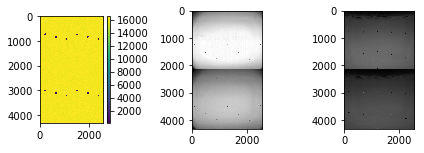

In [15]:
DIF_synthetic_path=paths.tmp_dir+'/DIF/dif_images/DIF_Synthetic_with_proper_metadata.png'
DIF1_focus_path=paths.tmp_dir+'/DIF/dif_images/focus/+0/2017-09-29_09.22.41/DispenserOpt_00006_2017-09-29_09.22.54.png'
DIF2_DOE_path=paths.tmp_dir+'/DIF/DIF2_2018-04-12_12.07.25/DispenserOpt_00001_2018-04-12_12.07.27.png'

DIF_synthetic_im16 = io.imread(DIF_synthetic_path, as_grey=True)
DIF1_focus_im16 = io.imread(DIF1_focus_path, as_grey=True)
DIF2_DOE_im16 = io.imread(DIF2_DOE_path, as_grey=True)

ic = io.imread_collection([DIF_synthetic_path, DIF1_focus_path, DIF2_DOE_path ])
io.imshow_collection(ic)

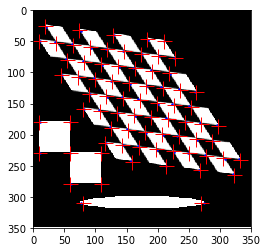

In [16]:
from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse


tform = AffineTransform(scale=(1.3, 1.1), rotation=1, shear=0.7,
                        translation=(210, 50))
image = warp(data.checkerboard(), tform.inverse, output_shape=(350, 350))
rr, cc = ellipse(310, 175, 10, 100)
image[rr, cc] = 1
image[180:230, 10:60] = 1
image[230:280, 60:110] = 1

coords = corner_peaks(corner_harris(image), min_distance=5)
coords_subpix = corner_subpix(image, coords, window_size=13)

fig, ax = plt.subplots()
ax.imshow(image, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], '.b', markersize=3)
ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
ax.axis((0, 350, 350, 0))
plt.show()